In [1]:
import emcee
from astropy.io import fits
import dill as pickle
from emcee import EnsembleSampler
import numpy as np
import os
import sys
import math
from astropy.cosmology import WMAP9 as cosmo
from colossus.halo import profile_nfw

pwd = os.getcwd()
little_things_root_dir = os.path.dirname(os.path.dirname(pwd))
sys.path.append(little_things_root_dir)

from little_things_lib.galaxy import Galaxy
from little_things_lib.nfw_mcmc_fitter import (
    EmceeParameters,
    get_mcmc_start_position, 
    generate_nwalkers_start_points, 
    lnprob)
from little_things_lib.plotting import plot_posterior_distributions, plot_walker_paths

%matplotlib inline
import matplotlib.pyplot as plt

little_things_root_dir = little_things_root_dir + '/notebooks/stephen/'

In [2]:
file_name = ['DDO43 pkl/sampler_04-Apr-2020.pkl', 
             'DDO52 pkl/sampler_03-Apr-2020.pkl', 
             'DDO168 pkl/sampler_15-Apr-2020.pkl', 
             'DDO154 pkl/sampler_16-Apr-2020.pkl', 
             'DDO46 pkl/sampler.pkl', 
             'UGC8508 pkl/sampler_20-May-2020.pkl',
             'NGC2366 pkl/sampler_06-May-2020.pkl']

galaxies = ['DDO43', 'DDO52', 'DDO168', 'DDO154', 'DDO46', 'UGC8508','NGC2366']

p_nfw = []

for i in file_name:
   with open(little_things_root_dir + i, 'rb') as f:
        sampler_i = pickle.load(f)
        rhos_chain_i = sampler_i.chain[:, :, 0].flatten()
        rs_chain_i = sampler_i.chain[:, :, 1].flatten()
        
        rhos_i = (10**(rhos_chain_i)) * (68**2)
        rs_i = 10**(rs_chain_i) / 68
        
        nfw = profile_nfw.NFWProfile(rhos = np.median(rhos_i[-15:]), rs = np.median(rs_i[-15:]))
        p_nfw.append(nfw.Vmax())

In [3]:
Vmax = []
rmax = []

for i in p_nfw:
    Vmax.append(i[0])
    rmax.append(i[1])
    
Rmax = [r * 68 for r in rmax]

print(Vmax, Rmax)

[35.755104028943684, 82.85708712515786, 121.92004278612583, 51.63888475324451, 85.48181101427991, 156.63071854975493, 47.87006487868268] [15.225789675315935, 35.79550556922931, 85.33453943369007, 19.111311244839456, 11.162212476279207, 242.19873397061295, 14.382595113979258]


In [4]:
V = np.array(range(100))
R = 26*(V/(100))**1.4

R_upper = 10**0.2*R
R_lower = 10**-0.2*R

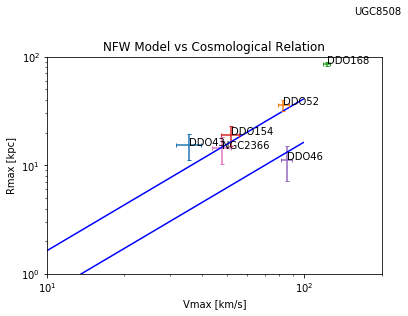

In [9]:
plt.title('NFW Model vs Cosmological Relation')
plt.xlabel('Vmax [km/s]')
plt.ylabel('Rmax [kpc]')

plt.loglog(10, 10, V, R_upper, color = 'b')
plt.loglog(10, 10, V, R_lower, color = 'b')
plt.xlim([10,200])
plt.ylim([1,100])

for i in range(len(Vmax)):
    v = Vmax[i]
    r = Rmax[i]
    plt.errorbar(v,r, yerr = 4 , xerr = 4, capsize = 2, capthick = 1)
    plt.text(v,r,galaxies[i])

plt.show()